In [15]:
import math
import numpy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d

### Задача №2

$$
\begin{cases}  
-\frac{d}{dx}(p(x)\frac{du}{dx})=f,
\\
u(a) = U_{a}, u(b) = U_{b},
\end{cases}  
$$

#### Формулы
$$
\int_{x_{n}}^{x_n+1}-\frac{d}{dx}(p(x)\frac{du}{dx})dx=\int_{x_{n}}^{x_n+1}f(x)dx
$$

$$
p_{k-1}y_{k-1} + (p_{k}-p_{k-1})y_{k+1} + p_{k}y_{k+1}=-h\int_{x_{n}}^{x_n+1}f(x)dx
$$


In [16]:
def task_2(a, b, Ua, Ub, h, p, int_f):
    count_x = int((b - a) / h) + 1
    x = numpy.linspace(a, b, count_x)

    A = numpy.zeros(shape=(count_x, count_x))
    A[0,0] = 1
    A[-1,-1] = 1
    B = numpy.zeros(shape=(count_x, 1))    
    B[0] = Ua
    B[-1] = Ub

    for i in range(1, count_x -1):
        A[i,i-1] = p(x[i-1])
        A[i, i] = - p(x[i]) - p(x[i-1])
        A[i, i+1] =  p(x[i])
        B[i] = - h * int_f(x[i])

    y = numpy.linalg.solve(A, B)
    plt.plot(x, y)
    plt.grid()
    plt.show()

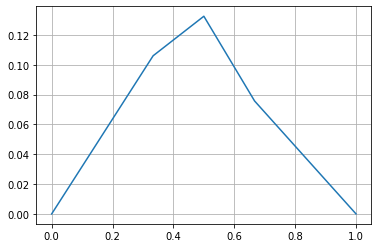

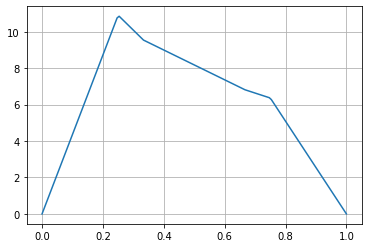

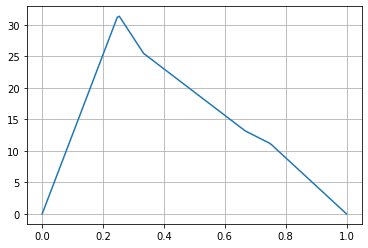

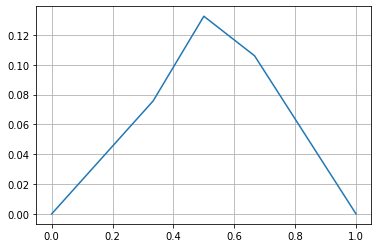

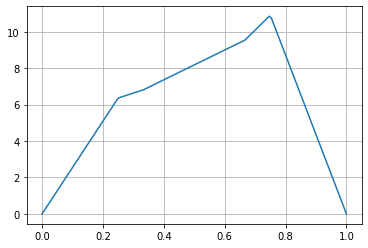

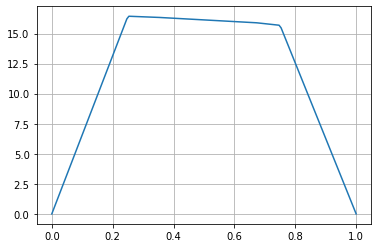

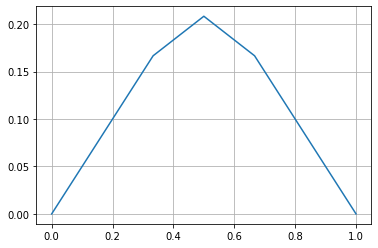

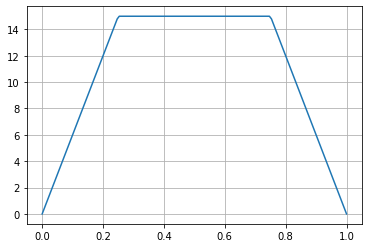

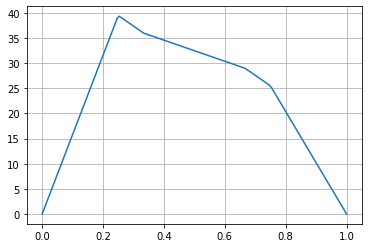

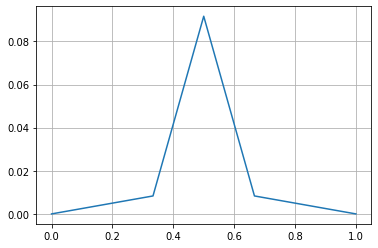

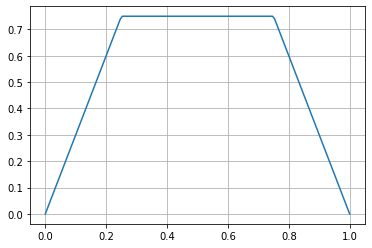

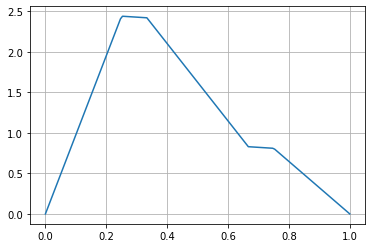

In [26]:
a, b = 0, 1
Ua, Ub = 0, 0
h = (b-a)/150
k = 1
def p1(x):
    if x <= a + (b-a)/3:
        return 1*k
    elif x <= a + 2*(b-a)/3:
        return 2*k
    else:
        return 3*k
def p2(x):
    if x <= a + (b-a)/3:
        return 3*k
    elif x <= a + 2*(b-a)/3:
        return 2*k
    else:
        return 1*k
def p3(x):
    if x <= a + (b-a)/3:
        return 1*k
    elif x <= a + 2*(b-a)/3:
        return 2*k
    else:
        return 1*k
def p4(x):
    if x <= a + (b-a)/3:
        return 20*k
    elif x <= a + 2*(b-a)/3:
        return k
    else:
        return 20*k
    
def int_f(x, c, x0):
    if abs(x-x0) < h - 1e-9:
        return c
    elif abs(x-x0) == h:
        return c/2
    else: 
        return 0

def int_f1(x):
    c = 1
    x0 = 0.5
    return int_f(x, c, x0)
    
def int_f2(x):
    c = 30
    x01 = ((a+b)/2 + a)/2
    x02 = ((a+b)/2 + b)/2
    return int_f(x, c, x01) + int_f(x, c, x02)
    
def int_f3(x):
    c1 = 100
    c2 = 30
    x01 = ((a+b)/2 + a)/2
    x02 = ((a+b)/2 + b)/2
    return int_f(x, c1, x01) + int_f(x, c2, x02)

for p in [p1, p2, p3, p4]:
    task_2(a, b, Ua, Ub, h, p, int_f1)
    task_2(a, b, Ua, Ub, h, p, int_f2)
    task_2(a, b, Ua, Ub, h, p, int_f3)

### Задача №3, №4
$$
y_{k}^v=
{\tau \cdot p_{k-1} \over h^2} y_{k-1}^{v-1}
+ (1 - {{\tau \cdot (p_{k}+p_{k-1})} \over h^2}) y_{k}^{v-1}
+ {\tau \cdot p_{k} \over h^2} y_{k+1}^{v-1}
+ \tau f_{k}^{v-1}
$$

In [27]:
def solution(a, b, Ua, Ub, h, T, tau, p, f, phi, count_plots):
    count_x = int((b - a) / h) + 1
    count_t = int(T / tau) + 1
    x = numpy.linspace(a, b, count_x)
    t = numpy.linspace(0, T, count_t)

    y = numpy.zeros(shape=(count_t, count_x))
    y[0, :] = numpy.array([phi(x[i]) for i in range(0, count_x)])
    y[:, 0] = numpy.array([Ua(t[i]) for i in range(count_t)])
    y[:, -1] = numpy.array([Ub(t[i]) for i in range(count_t)])

    for v in range(1, count_t):
        for k in range(1, count_x-1):
            y[v,k] = tau*p(x[k-1]) / h**2 * y[v-1,k-1] \
            + (1 - tau*(p(x[k])+p(x[k-1]))/h**2) * y[v-1,k] \
            + tau*p(x[k])/h**2 * y[v-1,k+1] \
            + tau * f(x[k],t[v-1])

#     plot = plt.axes(projection='3d')
#     plot.set_ylabel('t')
#     plot.set_xlabel('x')
#     plot.set_zlabel('y')
#     for i in range(0, count_t, plot_index_step):
#         plot.plot3D(x, numpy.array([t[i]]*count_x), y[i,:])
    
#     for i in range(0, count_t, (int)(count_t / count_plots)):
#         plt.plot(x, y[i,:])
    plt.plot(x, y[0,:])
    plt.grid()
    plt.show()

##### Решение задачи №3

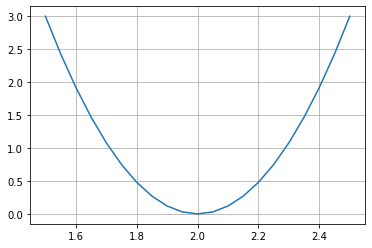

In [28]:
a, b = 1.5, 2.5

def Ua(x):
    return 3

def Ub(x):
    return 3

tau = 0.001
h = 0.05
T = 500 * tau

def p(x):
    return x**(-1/3)

def f(x, t):
    return (x + x**0.5)  * (1 - math.exp(-t))

def phi(x):
    return 12*(x-2)**2

count_plots = 20
solution(a, b, Ua, Ub, h, T, tau, p, f, phi, count_plots)

##### Решение задачи №4

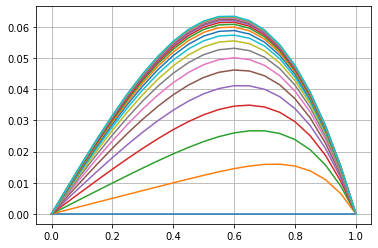

In [107]:
k = 1

a, b = 0, 1

def Ua(x):
    return 0

def Ub(x):
    return 0

tau = 0.5 * h**2 / k
h = 0.05
T = 0.5

def p(x):
    return k

def f(x, t):
    return x

def phi(x):
    return 0

count_plots = 20
solution(a, b, Ua, Ub, h, T, tau, p, f, phi, count_plots)